In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv
/kaggle/input/education-techie/student distilled 100 epochs .xlsx
/kaggle/input/chinesebank/chinese_bank.csv
/kaggle/input/journal-education-datasets-v000/distilled_for_train.xlsx
/kaggle/input/journal-education-datasets-v000/education_data_for_all_test.csv
/kaggle/input/journal-education-datasets-v000/education_data_for_all_train_original labels.csv
/kaggle/input/journal-education-datasets-v000/education_data_for_all_train.csv
/kaggle/input/journal-education-datasets-v000/distilled_for_train_TKP.xlsx


In [2]:
dataset=pd.read_csv(r"/kaggle/input/journal-education-datasets-v000/education_data_for_all_train.csv")
dataset.head()


,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,2913,1,1,2,10,1,1,1,14,21,...,0,6,8,6,14.75,0,7.6,2.6,0.32,0
1,4193,1,8,2,11,1,1,1,1,4,...,0,6,9,4,13.50,0,16.2,0.3,-0.92,0
2,1596,1,1,2,12,1,1,1,22,27,...,0,8,12,6,12.50,0,16.2,0.3,-0.92,0
3,3773,1,12,1,6,1,12,1,22,27,...,0,6,6,0,0.00,0,13.9,-0.3,0.79,1
4,4252,2,1,1,17,0,1,1,13,14,...,0,5,6,5,11.60,0,7.6,2.6,0.32,0


In [3]:
print("this is a good day")

this is a good day


In [4]:
for day in ["monday","thusday","wednesday"]:
    print(day," haha")

monday  haha
thusday  haha
wednesday  haha


In [5]:
random_state = 96

In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier


print("\n lightgbm \n","==="*30)
roc_curve_data = {}
auc_scores = {}
algorithms_performances_new = { }

import lightgbm
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score
import lightgbm as lgb
import joblib



###### print("===========***"*3," plot functions ","===========***"*3)
import matplotlib.pyplot as plt

def plot_roc_curve(fpr_list, tpr_list, pic_name_list,label=None):
    
    fpr = fpr_list[0]
    tpr = tpr_list[0]
    
    fpr_1 = fpr_list[1]
    tpr_1 = tpr_list[1]
    
    fpr_2 = fpr_list[2]
    tpr_2 = tpr_list[2]
    
    pic_name   =  "AUC : " + str(pic_name_list[0])
    pic_name_1 =  "AUC : " + str(pic_name_list[1])
    pic_name_2 =  "AUC : " + str(pic_name_list[2])
    
    pic_route = r"\kaggle\working\ " + pic_name + ".png"
    
    fig, ax = plt.subplots(figsize=(7,7)) 
    
#     plt.figure(figsize=(5,5))
    ax.plot(fpr  , tpr  , linewidth=3, color = "cornflowerblue", label=pic_name)
    ax.plot(fpr_1, tpr_1, linewidth=3, color = "darkorange", label=pic_name_1)
    ax.plot(fpr_2, tpr_2, linewidth=3, color = "limegreen", label=pic_name_2)
    
#     plt.plot(fpr, tpr, linewidth=2, label=pic_name)
    
    ax.plot([0,1],[0,1], "r--") 
    ax.axis([0,1,0,1])
    ax.legend(loc="lower left")
#     ax.set_title(pic_name)
    ax.grid(False)
    
    fig = ax.figure
    fig.savefig(pic_route)

    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive rate")

    
    
    
print("===========***"*3," metric function ","===========***"*3)


def performances_metrics(algorithms_performances_new, 
                         auc_avg,auc_std,
                         acc_avg,acc_std,
                         f1_avg,f1_std,
                         key_words,
                         y_test,
                         y_pred):
    
    

    key_words = str(key_words)
    print (" in the function, the key words == ",key_words )
    print("std_auc",std_auc)
    print("=========",key_words,"====@@====",auc_avg, "±" , auc_std ) #roc_auc_score(y_test, y_pred))

    algorithms_performances_new[key_words] = [auc_avg] # [roc_auc_score(y_test, y_pred)]
    
    cm = confusion_matrix(y_test, output_y_pred(y_pred))
 
    cm = cm.astype(np.float32)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    TPR = TP / (TP + FN)     # Sensitivity, hit rate, recall, or true positive rate
    TNR = TN / (TN + FP)     # Specificity or true negative rate
    PPV = TP / (TP + FP)     # Precision or positive predictive value
    NPV = TN / (TN + FN)     # Negative predictive value
    FPR = FP / (FP + TN)     # Fall out or false positive rate 
    FNR = FN / (TP + FN)     # False negative rate
    FDR = FP / (TP + FP)     # False discovery rate
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # accuracy    = accuracy_score(y_test, output_y_pred(y_pred))
    precision   = precision_score(y_test, output_y_pred(y_pred))
    recall      = recall_score(y_test, output_y_pred(y_pred))
    # f1          = f1_score(y_test,output_y_pred(y_pred))
    KS          = max(TPR-FPR)
    Specificity = 1- fpr
    G_Mean      = geometric_mean_score(y_test, output_y_pred(y_pred))
    BAcc        = ((TPR + TNR)/2)[0]                         #balanced accuracy (BAcc)
    tpr         = tpr
    MCC         = (TP*TN-FP*FN)/((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5
#     precision = TP/(TP+FP)
#     recall    = TP/(TP+FN)
    counts_ratio    = output_y_pred(y_pred).sum()/len(y_pred)
    Randon_accuracy = ((TP + FN)*(TP+FP) + (TN+FP)*(TN+FN))/(TP+TN+FP+FN)**2
    kappa0          = (TP+TN)/(TP+TN+FP+FN)
    kappa           = (kappa0-Randon_accuracy)/(1-Randon_accuracy)                                                     
                                                         

    
    algorithms_performances_new[key_words].append(auc_std) 
    algorithms_performances_new[key_words].append(acc_avg)
    algorithms_performances_new[key_words].append(acc_std)
    algorithms_performances_new[key_words].append(f1_avg)
    algorithms_performances_new[key_words].append(f1_std)
    
    
    algorithms_performances_new[key_words].append(precision)
    algorithms_performances_new[key_words].append(recall)
    # algorithms_performances_new[key_words].append(f1)
    algorithms_performances_new[key_words].append(KS)
    algorithms_performances_new[key_words].append(G_Mean)
    algorithms_performances_new[key_words].append(BAcc)
    algorithms_performances_new[key_words].append(tpr[1])
    algorithms_performances_new[key_words].append(MCC[1])
    algorithms_performances_new[key_words].append(counts_ratio)
    algorithms_performances_new[key_words].append(kappa[1])
    
    pd.DataFrame(algorithms_performances_new,index=["AUC","AUC std",
                                                    "Accuracy","Accuracy std",
                                                    "F1 score","F1 score std",
                                                    "Precision","Recall",
                                                    "KS","G_Mean","BAcc","tpr","MCC","counts_ratio","kappa"
                                                   ]).transpose()
    return algorithms_performances_new


def output_y_pred(y_pred):
    threshold = 0.5
    y_pred[y_pred <= threshold] = 0.
    y_pred[y_pred >  threshold] = 1.
    return y_pred


def data_preprocessing(df):
    
    df.rename(columns={'Target':'label'},inplace = True)
    df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)
    
    return df


def standardize_features(df, label_column):
    # Separate features and label
    features = df.drop(columns=label_column)
    label = df[label_column]

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the features
    features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Combine the scaled features with the label
    df_scaled = pd.concat([features_scaled, label.reset_index(drop=True)], axis=1)

    return df_scaled



 lightgbm 
===========***===========***===========***  metric function  ===========***===========***===========***


In [7]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [8]:
# !pip install tabpfn
# from tabpfn import TabPFNClassifier
# TabPFNClassifier = TabPFNClassifier(device='cuda',N_ensemble_configurations=64)

In [9]:
# !pip install ctgan

In [10]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.11.0
    Uninstalling platformdirs-3.11.0:
      Successfully uninstalled platformdirs-3.11.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.23
    Uninstalling botocore-1.35.23:
      Successfully uninstalled botocore-1.35.23
  Attempting

In [11]:
!git clone https://github.com/penfever/TuneTables.git
# !rm -rf /kaggle/working/*

Cloning into 'TuneTables'...
remote: Enumerating objects: 2738, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 2738 (delta 10), reused 18 (delta 7), pack-reused 2712 (from 1)
Receiving objects: 100% (2738/2738), 296.89 MiB | 15.96 MiB/s, done.
Resolving deltas: 100% (1858/1858), done.


In [12]:
cd /kaggle/working/TuneTables/tunetables

/kaggle/working/TuneTables/tunetables


In [13]:
! python batch/run_tt_job.py
# ! python  run_baselines.py

Traceback (most recent call last):
  File "/kaggle/working/TuneTables/tunetables/batch/run_tt_job.py", line 544, in <module>
    main_f(args)
  File "/kaggle/working/TuneTables/tunetables/batch/run_tt_job.py", line 426, in main_f
    with open(args.datasets) as f:
FileNotFoundError: [Errno 2] No such file or directory: '../metadata/subset.txt'


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score,\
                            accuracy_score, balanced_accuracy_score,classification_report,confusion_matrix#,\
#                             plot_confusion_matrix, confusion_matrix


# import sklearn.metrics.plot_confusion_matrix


from sklearn.model_selection import KFold, GridSearchCV

import lightgbm as lgb
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from sklearn.utils import shuffle

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
# np.random.seed(1635848)

In [15]:
# df_for_train            = pd.read_csv(r'/kaggle/input/journal-education-datasets-v000/education_data_for_all_train.csv')
# df_for_train = data_preprocessing(df_for_train)
# df_for_train.drop(["Unnamed: 0"],axis = 1,inplace = True)


df_for_train            = pd.read_csv(r'/kaggle/input/journal-education-datasets-v000/education_data_for_all_train_original labels.csv')
df_for_train = data_preprocessing(df_for_train)
df_for_train.drop(["Unnamed: 0"],axis = 1,inplace = True)


df_for_test             = pd.read_csv(r'/kaggle/input/journal-education-datasets-v000/education_data_for_all_test.csv')
df_for_test = data_preprocessing(df_for_test)
df_for_test.drop(["Unnamed: 0"],axis = 1,inplace = True)

df_for_train_distilled  = pd.read_excel(r'/kaggle/input/journal-education-datasets-v000/distilled_for_train_TKP.xlsx')
df_for_train_distilled = data_preprocessing(df_for_train_distilled)
df_for_train_distilled.drop(["Unnamed: 0"],axis = 1,inplace = True)
df_for_train_distilled.columns = df_for_train.columns



In [16]:

df_for_train['label'] = df_for_train['label'].map({
                                    'Dropout':1,
                                    'Enrolled':0,
                                    'Graduate':0})

df_for_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,1,14,1,10,1,14,1,2,1,2,...,6,10,13,10,11.800000,0,13.9,-0.3,0.79,0
1,1,12,1,8,1,1,1,1,1,12,...,0,5,5,0,0.000000,5,12.7,3.7,-1.70,1
2,1,15,1,4,1,14,1,1,28,10,...,0,6,15,4,10.500000,0,15.5,2.8,-4.06,0
3,1,7,1,5,1,1,1,1,1,5,...,0,6,6,6,12.833333,0,12.4,0.5,1.79,0
4,1,8,1,12,1,1,1,22,27,6,...,0,8,8,7,14.731429,0,10.8,1.4,1.74,0


In [17]:
len_datashape = df_for_train.shape[0]
len_datashape

3539

In [18]:
# df_for_train

In [19]:

# df.head()
# df = df.iloc[:-10,:]
print(df_for_train.shape)

# df_original = data_preprocessing(df_for_train)

scaler = StandardScaler()

# df_original['label'] = df_original['label'].map({'Dropout':1,
#                                                 'Enrolled':0,
#                                                 'Graduate':0})
# print(df_original["label"].unique())

# X = scaler.fit_transform(df_original.drop('label', axis = 1))
# y = df_original['label'].values

# X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2,
#                                                                                         random_state = random_state)

# df_train_original = np.concatenate ((X_train_original,y_train_original.reshape(-1,1)),axis=1)
# df_test_original  = np.concatenate ((X_test_original,y_test_original.reshape(-1,1)),axis=1)


discrete_columns = list(df_for_train.columns.values)

df_for_train_scaled = standardize_features(df_for_train, 'label')
df_for_test_scaled  = standardize_features(df_for_test, 'label')
df_for_train_distilled_scaled  = standardize_features(df_for_train_distilled, 'label')


X_train_original = df_for_train_scaled.iloc[:,:-1].values   
y_train_original = df_for_train_scaled["label"].values

# X_test_original  # 这是general的测试集 X_test
# y_test_original  # 这是general的测试集 y_test

X_test_original  = df_for_test_scaled.iloc[:,:-1].values
y_test_original  = df_for_test_scaled["label"].values


X_train_distilled = df_for_train_distilled_scaled.iloc[:,:-1].values  
y_train_distilled = df_for_train_distilled_scaled["label"].values

(3539, 35)


In [20]:
df_for_train_distilled_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.403186,-1.433388,-0.666605,-0.835859,0.229560,-0.339279,-0.122469,-0.988063,-1.288050,-0.970380,...,3.741231,2.627816,0.820483,2.541415,1.205800,-0.467761,1.476741,0.727879,-1.717771,0
1,1.331812,-0.186532,-0.840480,-0.946280,-2.728318,-0.122611,0.092565,0.515159,0.966564,-1.042858,...,3.245108,2.149043,2.649106,1.903891,0.536450,-0.022182,-0.306681,0.287110,0.951828,0
2,-0.116130,-1.022651,2.359183,-0.020854,0.376416,-0.505009,0.360884,-0.277521,0.303769,-0.544735,...,0.322196,-0.409914,0.848320,0.164033,0.548072,-0.727130,1.028738,-1.209077,0.230279,0
3,-0.539967,-1.440541,-0.205254,0.579150,0.278962,-0.061961,-0.473674,1.024623,0.461468,0.041122,...,-0.289024,0.314243,-0.880583,0.355641,0.837421,0.274933,1.808609,-0.079554,-0.094547,0
4,-0.437716,-0.355766,-0.825579,-1.267876,0.273373,0.323263,-0.172096,-0.840358,-1.026772,0.097605,...,0.825103,-0.040846,0.346726,0.947239,0.948185,-0.112300,0.843317,-1.386259,0.312188,0


In [21]:
df_for_train_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.29202,1.340816,-0.556229,0.020585,0.347852,2.842606,-0.142136,-1.139930,-1.402409,-1.337426,...,2.836043,1.700121,1.250659,1.838465,0.304781,-0.195530,0.872138,-1.103473,0.339595,0
1,-0.29202,0.963663,-0.556229,-0.440492,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,1.181547,...,-0.283546,-0.552829,-0.765664,-1.464407,-1.949336,6.822546,0.421006,1.795972,-0.756629,1
2,-0.29202,1.529392,-0.556229,-1.362645,0.347852,2.842606,-0.142136,-1.250968,1.045651,0.677753,...,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.195530,1.473648,1.143597,-1.795621,0
3,-0.29202,0.020781,-0.556229,-1.132106,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,-0.581734,...,-0.283546,-0.102239,-0.513624,0.517316,0.502175,-0.195530,0.308223,-0.523584,0.779846,0
4,-0.29202,0.209358,-0.556229,0.481661,0.347852,-0.390915,-0.142136,1.080819,0.954982,-0.329837,...,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.195530,-0.293287,0.128791,0.757833,0


In [22]:
# run_lgb_on_original(X_train_distilled,y_train_distilled,
#                     X_test_original,y_test_original)

In [23]:

# run_lgb_on_original(X_train_original,y_train_original,
#                     X_test_original,y_test_original)

In [24]:
# # Initialize and train the logistic regression model
# log_reg = LogisticRegression()
# log_reg.fit(X_train_original, y_train_original)

# # Make predictions
# y_pred = log_reg.predict(X_test_original)
# y_pred_proba = log_reg.predict_proba(X_test_original)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test_original, y_pred_proba)

# print("Accuracy:", accuracy)
# print("original AUC:", auc)


# # Initialize and train the logistic regression model
# log_reg = LogisticRegression()
# log_reg.fit(X_train_distilled, y_train_distilled)

# # Make predictions
# y_pred = log_reg.predict(X_test_original)
# y_pred_proba = log_reg.predict_proba(X_test_original)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test_original, y_pred_proba)

# print("Accuracy:", accuracy)
# print("distilled AUC:", auc)

In [25]:
df_for_test_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.31092,1.461237,-0.554749,-0.432201,0.348817,2.694440,-0.138147,-1.271024,-0.266109,-0.556052,...,0.216053,-0.112420,0.714482,-0.787543,0.916255,-0.233355,0.800601,-1.127418,0.430059,0
1,-0.31092,0.154037,1.039254,0.501290,0.348817,-0.408306,-0.138147,0.054546,-1.446822,0.585725,...,-0.292476,0.783902,0.470909,1.191564,0.447719,-0.233355,0.262748,-0.562672,0.880887,0
2,-0.31092,0.901008,-0.554749,0.968036,0.348817,-0.408306,-0.138147,0.054546,-0.266109,-0.784407,...,-0.292476,-0.112420,-1.964826,-1.447245,-1.952331,-0.233355,0.262748,-0.562672,0.880887,1
3,-0.31092,-0.779678,-0.554749,-0.198828,0.348817,-0.408306,-0.138147,0.054546,1.005427,-0.327696,...,-0.292476,-0.560581,-0.503385,-0.457692,0.055679,-0.233355,0.800601,-1.127418,0.430059,0
4,-0.31092,0.154037,1.836256,0.501290,0.348817,-0.408306,-0.138147,1.159186,0.914603,0.585725,...,-0.292476,0.783902,0.227335,1.191564,0.926880,-0.233355,1.625309,-0.703859,-0.340856,0


In [26]:
# df_the_distilled_100.columns

In [27]:

''' this is the distilled dataset ''' #数据蒸馏的样本数据集

df_x_distilled  = df_for_train_distilled.drop(["label"],axis = "columns")
df_y_distilled  = df_for_train_distilled["label"]


df_labelled_x   = df_for_train.drop(["label"],axis = "columns")
df_labelled_y   = df_for_train["label"]

In [28]:
df_for_train_distilled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.424887,-1.415497,-0.724026,-0.885754,0.245225,-0.332152,-0.129718,-1.030887,-1.413097,-1.055564,...,3.971983,2.760099,0.881942,2.305803,1.124170,-0.489064,1.538142,0.745064,-1.829844,0
1,1.513156,-0.136197,-0.912935,-1.005592,-2.909487,-0.102646,0.106948,0.538147,0.987789,-1.130222,...,3.446012,2.251542,2.948076,1.653099,0.369888,0.017663,-0.314642,0.278049,0.997461,0
2,-0.104237,-0.994072,2.563366,-0.001247,0.401853,-0.507703,0.402260,-0.289237,0.281995,-0.617110,...,0.347253,-0.466606,0.913394,-0.128188,0.382984,-0.784027,1.072715,-1.307230,0.233286,0
3,-0.577675,-1.422836,-0.222788,0.649924,0.297914,-0.038402,-0.516254,1.069916,0.449924,-0.013625,...,-0.300739,0.302600,-1.040067,0.067982,0.709048,0.355552,1.882918,-0.110449,-0.110729,0
4,-0.463457,-0.309835,-0.896745,-1.354613,0.291953,0.369648,-0.184338,-0.876715,-1.134868,0.044558,...,0.880416,-0.074578,0.346651,0.673667,0.833867,-0.084823,0.880082,-1.494962,0.320034,0


data synthetic process started...


Gen. (-1.11) | Discrim. (-0.39): 100%|██████████| 500/500 [02:40<00:00,  3.11it/s]


running time ==  181.8774814605713


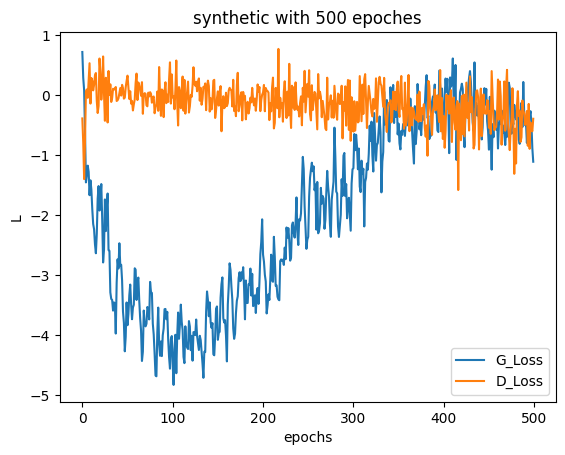

In [29]:
print("data synthetic process started...")


epochs = [10,100,500,1000,2000,3000,5000]
epochs = [100,500,2000,len_datashape]
epoch  = epochs[2]
epoch  = epochs[1]
    

def the_conditional_generated_datasets(df_for_train_scaled,epoch):
    
    df_train_shaped = df_for_train_scaled

    import time

    import sdv
    from sdv.metadata import SingleTableMetadata
    from sdv.single_table import GaussianCopulaSynthesizer
    
    from sdv.single_table import CTGANSynthesizer

    '''training the conditional gannetwork'''
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df_train_shaped)
    metadata.visualize(show_table_details='summarized',output_filepath='my_metadata.png')

    '''generate the synthetic data'''



    start_time = time.time()

    synthesizer = CTGANSynthesizer(metadata,enforce_rounding=False,
                                   epochs=epoch, 
                                   verbose=True)
    
    synthesizer.fit(df_train_shaped)
    synthetic_data = synthesizer.sample(num_rows=1000)

    end_time = time.time()

    print("running time == ", end_time - start_time )

    ''' generating the datasets'''
    synthetic_data_dict = {}
    sample_sizes = [100,500,1000,2000,3000]

    # Create synthetic data
    for sample_size in sample_sizes:
        key_words = "syn_data_set_" + str(sample_size)
        synthetic_data_dict[key_words] = synthesizer.sample(sample_size)
        synthetic_data_dict[key_words].to_excel("/kaggle/working/stats_"+ key_words + "_" + str(epoch)+ "_.xlsx")

    ''' plot the conditional tabular generative adversal network'''

    def synthetic_plot(synthesizer):
        G_Loss = synthesizer.get_loss_values()["Generator Loss"]
        D_Loss = synthesizer.get_loss_values()["Discriminator Loss"]
        x_index = synthesizer.get_loss_values()["Epoch"]

        fig,ax = plt.subplots() 
        ax.plot(x_index,G_Loss,label='G_Loss')
        ax.plot(x_index,D_Loss,label='D_Loss')

        ax.set_xlabel('epochs')
        ax.set_ylabel('L')

        ax.set_title('synthetic with {} epoches'.format(epoch))
        ax.legend()
        plt.show()

    synthetic_plot(synthesizer)
    
    return synthetic_data_dict

# epoch = 200
synthetic_data_dict = the_conditional_generated_datasets(df_for_train_scaled,epoch)


                                                         
synthetic_data_dict["syn_data_set_2000"].rename(columns={'Target':'label'},inplace = True)

In [30]:
synthetic_data_dict["syn_data_set_2000"].to_csv('/kaggle/working/synthetic_2000.csv')

In [31]:
y_train_original[:5]

array([0, 1, 0, 0, 0])

In [32]:

# ''' this is for lgb run '''    
# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score

# auc_all_algorithm = { }
# algorithms_performances_new = {}


# def run_lgb_on_synthetic(X_train,y_train,X_test_original,y_test_original,dataset_key):
    
#     key_words = "LGB_" + str(dataset_key)

#     lgb_synthetic = lgb.LGBMClassifier()
#     lgb_synthetic.fit(X_train, y_train)
#     y_pred_synthetic = lgb_synthetic.predict(X_test_original)
#     auc_all_algorithm[key_words] = roc_auc_score(y_test_original, y_pred_synthetic)
    
#     performances_metrics(algorithms_performances_new,key_words,y_test_original,y_pred_synthetic)
    


#     return auc_all_algorithm

# '''====================================================='''

# def run_lgb_on_original(X_train,y_train,X_test_original,y_test_original):
    
    
#     key_words = "LGB_original"
    
#     lgb_original = lgb.LGBMClassifier()
#     lgb_original.fit(X_train, y_train)
#     y_pred_original = lgb_original.predict(X_test_original)
    
#     auc_all_algorithm[key_words] = roc_auc_score(y_test_original, y_pred_original)
    
#     performances_metrics(algorithms_performances_new,key_words,y_test_original,y_pred_original)

#     return auc_all_algorithm

# run_lgb_on_original(X_train_original,y_train_original,X_test_original,y_test_original)



# '''====================================================='''

# for dataset_key in synthetic_data_dict.keys():
    
#     print(dataset_key)
    
#     synthetic_data_x_train = synthetic_data_dict[dataset_key].drop(columns=['label']).values
#     synthetic_data_y_train = synthetic_data_dict[dataset_key]["label"].values
    
#     run_lgb_on_synthetic(synthetic_data_x_train,synthetic_data_y_train,X_test_original,y_test_original,dataset_key)
    

# pd.DataFrame(auc_all_algorithm,index=["Conditional Synthetic AUC"]).transpose()

In [33]:
# synthetic_data_dict["syn_data_set_2000"]

In [34]:
# pd.DataFrame(algorithms_performances_new,index=["AUC","Accuracy","Precision","Recall",#                                                 "F1 score","KS","G_Mean","BAcc","tpr","MCC","counts_ratio","kappa"
#                                                ]).transpose()

In [35]:
# synthetic_data_dict["syn_data_set_2000"]

In [36]:
# Import libraries
import os
import pathlib

# Let's say you already have list of files under /kaggle/working directory
for n in range(10):
    with open(os.getcwd() + '/file_' + str(n) + '.png', 'w') as file:
        file.write('delete this file')
        
# Deleting the files
files_to_delete = './*.png' # this considers only ".txt" files. If you want to delete all files, use "./*"
files_list = pathlib.Path(os.getcwd()).glob(files_to_delete)
for file_path in files_list:
    os.remove(file_path)

In [37]:
# df_original = pd.read_csv(r"/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv")
# # df.info()
# df_original.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

# df_original.rename(columns={'Target':'label'},inplace = True)
# df_original.label.value_counts()
# scaler = StandardScaler()
# df_original['label'] = df_original['label'].map({
#                                     'Dropout':1,
#                                     'Enrolled':0,
#                                     'Graduate':0})


df_synthetic_2000 = synthetic_data_dict["syn_data_set_2000"].copy()
# df_synthetic_2000.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

# df_synthetic_2000.rename(columns={'Target':'label'},inplace = True)

# scaler = StandardScaler()
# df_synthetic_2000['label'] =df_synthetic_2000['label'].map({
#                                         'Dropout':1,
#                                         'Enrolled':0,
#                                         'Graduate':0})


In [38]:
# df_synthetic_2000

In [39]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# dataset_dict= {}

# df_labelled_x_completee_data  = df_selective_2.drop(["Target"],axis = "columns")
# df_labelled_x_selective_data = df_selective_2[important_cols]

# dataset_dict["df_labelled_x_completee_data"] = df_labelled_x_completee_data
# dataset_dict["df_labelled_x_selective_data"] = df_labelled_x_selective_data

# df_y = df_selective_2["Target"]



# sns.set(color_codes=True)
color_dict = dict({'0':'orange',
                   '1':'#067ef7'
                   })

nrows = 7

def original_data_hist_plot(dataset_dict):
    
    sns.set_theme(style="white")
    
    n = len(dataset_dict)
    
    fig, ax = plt.subplots(nrows,int(n/nrows), sharey="row",figsize=(10,10))

    ck = 0
    keys = list(dataset_dict.keys())
    for keys_index in range(len(dataset_dict.keys())):
        
        X_CV =  dataset_dict[keys[keys_index]]
        y_CV =  df_y
    
#         print("imbalanced ratio : ",len(y_give_CV)/y_give_CV.sum())
        X_stand = StandardScaler().fit_transform(X_CV)
        pca = PCA(n_components=2).fit(X_stand)
        X_pca = pca.transform(X_stand)
        
            
#         fig_name = "ratio : " + str(np.round(len(y_CV)/y_CV.sum(),1))

    
        sns.scatterplot(x=X_pca[:, 0], 
                        y=X_pca[:, 1], hue=y_CV.astype(str), alpha=0.7, ax = ax[ck//nrows,ck%nrows],
                        edgecolor="white",
                        palette = color_dict,edgecolors=None)
        
        
#         plt.xlabel('1st Principal Component')
#         plt.ylabel('2nd Principal Component')
        
        ax[ck//nrows,ck%nrows].title.set_text(keys[keys_index])
        ax[ck//nrows,ck%nrows].grid(False)
        ax[ck//nrows,ck%nrows].set_xlim(-10, 20)
        ax[ck//nrows,ck%nrows].set_ylim(-5, 20)

        
        ck += 1

        plt.tick_params(bottom=False, labelbottom=False, labelleft=False)


    plt.grid(False)
    plt.suptitle('Training set visualisation using PCA features')
    plt.savefig("data distribution plotting.png",dpi=600)
    plt.show()

In [40]:

# Histogram

selected_cols = ["Curricular units 2nd sem (grade)","Curricular units 2nd sem (approved)",
                "Curricular units 1st sem (grade)","Curricular units 1st sem (approved)",
                "Gender","Age",
                 "Unemployment rate","Debtor"]

ck = 0
nrows = 2
ncols = int(len(selected_cols)/nrows)


In [41]:
import seaborn

''' this is the first one '''   #原始数据集


print("\n原始训练集：")
print(df_for_train_scaled.shape)
print("\n原始测试集：")
print(df_for_test_scaled.shape)

# df_original_y = {}
# df_original_x = X_train_original
# df_original_y = y_train_original




original_column_names = list(df_for_train.columns)
'''============================================'''
'''============================================'''


''' this is the second one '''  # 2000个样本的数据集
df_synthetic_2000_students  = df_synthetic_2000.copy()

df_synthetic_2000_students_x  = df_synthetic_2000_students.drop(["label"],axis = "columns")
df_synthetic_2000_students_y  = df_synthetic_2000_students["label"]

'''============================================'''
'''============================================'''






原始训练集：
(3539, 35)

原始测试集：
(885, 35)


'============================================'

In [42]:
df_for_train_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.29202,1.340816,-0.556229,0.020585,0.347852,2.842606,-0.142136,-1.139930,-1.402409,-1.337426,...,2.836043,1.700121,1.250659,1.838465,0.304781,-0.195530,0.872138,-1.103473,0.339595,0
1,-0.29202,0.963663,-0.556229,-0.440492,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,1.181547,...,-0.283546,-0.552829,-0.765664,-1.464407,-1.949336,6.822546,0.421006,1.795972,-0.756629,1
2,-0.29202,1.529392,-0.556229,-1.362645,0.347852,2.842606,-0.142136,-1.250968,1.045651,0.677753,...,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.195530,1.473648,1.143597,-1.795621,0
3,-0.29202,0.020781,-0.556229,-1.132106,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,-0.581734,...,-0.283546,-0.102239,-0.513624,0.517316,0.502175,-0.195530,0.308223,-0.523584,0.779846,0
4,-0.29202,0.209358,-0.556229,0.481661,0.347852,-0.390915,-0.142136,1.080819,0.954982,-0.329837,...,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.195530,-0.293287,0.128791,0.757833,0


In [43]:
df_x_original_for_train = X_train_original
df_y_original_for_train = y_train_original

df_x_synthetic_for_train   = df_synthetic_2000_students.drop(["label"],axis = "columns")
df_y_synthetic__for_train  = df_synthetic_2000_students["label"]


df_y = {}


important_cols = [
                   'Marital status', 'Application mode', 'Application order', 'Course',
                   'Daytime/evening attendance', 'Previous qualification', 'Nationality',
                   "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 
                   'Displaced',
                   'Educational special needs', 
                   'Debtor', 'Tuition fees up to date',
                   
                   'Gender', 'Scholarship holder', 'Age', 'International',
                   
#                    'Curricular units 1st sem (credited)',
#                    'Curricular units 1st sem (enrolled)',
#                    'Curricular units 1st sem (evaluations)',
#                    'Curricular units 1st sem (approved)',
#                    'Curricular units 1st sem (grade)',
#                    'Curricular units 1st sem (without evaluations)',
#                    'Curricular units 2nd sem (credited)',
#                    'Curricular units 2nd sem (enrolled)',
#                    'Curricular units 2nd sem (evaluations)',
#                    'Curricular units 2nd sem (approved)',
#                    'Curricular units 2nd sem (grade)',
#                    'Curricular units 2nd sem (without evaluations)',

                   'Unemployment rate','Inflation rate', 'GDP', 
#                    'Target'
                   ]

complete_cols = [   
                   # demographic
                   'Marital status', 'Application mode', 'Application order', 'Course',
                   'Daytime/evening attendance', 'Previous qualification', 'Nationality',
                   "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 
                   'Displaced',
                   'Educational special needs', 
                     
                   # socioeconomic
                   'Debtor', 'Tuition fees up to date','Scholarship holder', 'International', 
                   
                   'Gender',  'Age',
                   
                   'Curricular units 1st sem (credited)',
                   'Curricular units 1st sem (enrolled)',
                   'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)',
                   'Curricular units 1st sem (grade)',
                   'Curricular units 1st sem (without evaluations)',
                   'Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)',
                   'Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)',
                   'Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)',
                    
                    # macroeconomic
                   'Unemployment rate','Inflation rate', 'GDP', 
#                    'Target'
                   ]

academic_cols = [
                   'Curricular units 1st sem (credited)',
                   'Curricular units 1st sem (enrolled)',
                   'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)',
                   'Curricular units 1st sem (grade)',
                   'Curricular units 1st sem (without evaluations)',
                   'Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)',
                   'Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)',
                   'Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)',
                    ]



Macroeconomic_col = ['Unemployment rate',
                     'Inflation rate',
                     'GDP']

Socioeconomic_col = ['Debtor', 
                     'Tuition fees up to date',
                     'Scholarship holder',
                     'International', ]
Demographic_col   = [                   
                       'Marital status', 'Application mode', 'Application order', 'Course',
                       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
                       "Mother's qualification", "Father's qualification","Mother's occupation", "Father's occupation", 
                       'Displaced',
                       'Educational special needs', ]


df_x_original_complete      = df_for_train_scaled[complete_cols]

df_x_original_academic      = df_for_train_scaled[academic_cols]

df_x_original_macro_econ    = df_for_train_scaled[Macroeconomic_col]

df_x_original_Demographic   = df_for_train_scaled[Demographic_col]

df_x_original_Socioeconomic = df_for_train_scaled[Socioeconomic_col]

df_x_original_onlynot_academic = df_for_train_scaled[important_cols]



df_dataset_dict = {}

df_dataset_dict["complete data"]             = df_x_original_complete
df_dataset_dict["only academic data"]        = df_x_original_academic
df_dataset_dict["without academic data"]     = df_x_original_onlynot_academic
df_dataset_dict[" only Demographic data"]    = df_x_original_Demographic


df_y["complete data"]            = df_y_original_for_train
df_y["only academic data"]       = df_y_original_for_train
df_y["without academic data"]    = df_y_original_for_train
df_y[" only Demographic data"]   = df_y_original_for_train

# df_labelled_dict["academic_cols"]   =

plot2 = {}
plot2["complete data"       ]     = df_x_original_complete
plot2["only academic data"   ]     = df_x_original_academic
plot2["without academic data"]      = df_x_original_onlynot_academic
# plot2[" only macro_econ data"]    = df_labelled_x_macro_econ
plot2[" only Demographic data"]     = df_x_original_Demographic
# plot2[" only Socioeconomic data"]    = df_labelled_x_Socioeconomic


'''→→→→→→→→→→→   ←←←←←←←←←←←←←'''
''' this is for the generated adversal network'''
'''→→→→→→→→→→→   ←←←←←←←←←←←←←'''

df_x_synthetic_for_train_complete      = df_x_synthetic_for_train[complete_cols]

df_x_synthetic_for_train_academic      = df_x_synthetic_for_train[academic_cols]

df_x_synthetic_for_train_macro_econ    = df_x_synthetic_for_train[Macroeconomic_col]

df_x_synthetic_for_train_Demographic   = df_x_synthetic_for_train[Demographic_col]

df_x_synthetic_for_train_Socioeconomic = df_x_synthetic_for_train[Socioeconomic_col]

df_x_synthetic_for_train_onlynot_academic      = df_x_synthetic_for_train[important_cols]




df_dataset_dict["synthetic ==> complete data"]             = df_x_synthetic_for_train_complete
df_dataset_dict["synthetic ==> only academic data"]        = df_x_synthetic_for_train_academic
df_dataset_dict["synthetic ==> without academic data"]     = df_x_synthetic_for_train_onlynot_academic
df_dataset_dict["synthetic ==> only Demographic data"]     = df_x_synthetic_for_train_Demographic


df_y["synthetic ==> complete data"]           = df_synthetic_2000_students_y
df_y["synthetic ==> only academic data"]      = df_synthetic_2000_students_y
df_y["synthetic ==> without academic data"]   = df_synthetic_2000_students_y
df_y["synthetic ==> only Demographic data"]   = df_synthetic_2000_students_y



'''→→→→→→→→→→→   ←←←←←←←←←←←←←'''
''' this is for the distilled datasets'''
'''→→→→→→→→→→→   ←←←←←←←←←←←←←'''

df_labelled_x_distilled_complete      = df_for_train_distilled[complete_cols]

df_labelled_x_distilled_academic      = df_for_train_distilled[academic_cols]

df_labelled_x_distilled_macro_econ    = df_for_train_distilled[Macroeconomic_col]

df_labelled_x_distilled_Demographic   = df_for_train_distilled[Demographic_col]

df_labelled_x_distilled_Socioeconomic = df_for_train_distilled[Socioeconomic_col]

df_labelled_x_distilled_onlynot_academic = df_for_train_distilled[important_cols]




df_dataset_dict["distilled ==> complete data"]             = df_labelled_x_distilled_complete
df_dataset_dict["distilled ==> only academic data"]        = df_labelled_x_distilled_academic
df_dataset_dict["distilled ==> without academic data"]     = df_labelled_x_distilled_onlynot_academic
df_dataset_dict["distilled ==> only Demographic data"]     = df_labelled_x_distilled_Demographic


df_y["distilled ==> complete data"]           = df_y_distilled
df_y["distilled ==> only academic data"]      = df_y_distilled
df_y["distilled ==> without academic data"]   = df_y_distilled
df_y["distilled ==> only Demographic data"]   = df_y_distilled


In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Neural_network = make_pipeline(
                                StandardScaler(),
                                MLPClassifier(hidden_layer_sizes=(5,),
                                             activation='logistic', 
                                             max_iter=10000,
                                             learning_rate='invscaling',
                                             random_state=0))

In [45]:
def original_test_dataset_transform(df_test_original,columns):
   
    columns = list(columns)
    columns.append("label")

    # print("columns:",columns)

    df = df_test_original[columns]

    scaler = StandardScaler()

    original_test_x = scaler.fit_transform(df.drop('label', axis = 1))
    original_test_y = df['label'].values

    print("the trainset size == ",original_test_x.shape)
    print("the testset size == " ,original_test_y.shape)

    # print("original_test_y is none", df)
    
    return original_test_x,original_test_y
    

In [46]:
# import pandas as pd
# from sklearn.preprocessing   import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics         import roc_auc_score
# import lightgbm as lgb

# df = pd.read_csv('/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv')
# df.head()
# df.rename(columns={'Target':'label'},inplace = True)
# df.label.value_counts()
# scaler = StandardScaler()
# df['label'] = df['label'].map({
#                                     'Dropout':1,
#                                     'Enrolled':0,
#                                     'Graduate':0})

# X = scaler.fit_transform(df.drop('label', axis = 1))
# y = df['label'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [47]:
# df_y["synthetic ==> complete data"]

In [48]:
df_y.keys()

dict_keys(['complete data', 'only academic data', 'without academic data', ' only Demographic data', 'synthetic ==> complete data', 'synthetic ==> only academic data', 'synthetic ==> without academic data', 'synthetic ==> only Demographic data', 'distilled ==> complete data', 'distilled ==> only academic data', 'distilled ==> without academic data', 'distilled ==> only Demographic data'])

In [49]:
df_y["complete data"]

array([0, 1, 0, ..., 0, 1, 0])

In [50]:
df_dataset_dict["synthetic ==> complete data"].keys()

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Scholarship holder', 'International', 'Gender', 'Age',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [51]:
df_dataset_dict.keys()
df_dataset_dict["complete data"].head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.29202,1.340816,-0.556229,0.020585,0.347852,2.842606,-0.142136,-1.139930,-1.402409,-1.337426,...,-0.210957,2.836043,1.700121,1.250659,1.838465,0.304781,-0.195530,0.872138,-1.103473,0.339595
1,-0.29202,0.963663,-0.556229,-0.440492,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,1.181547,...,1.297276,-0.283546,-0.552829,-0.765664,-1.464407,-1.949336,6.822546,0.421006,1.795972,-0.756629
2,-0.29202,1.529392,-0.556229,-1.362645,0.347852,2.842606,-0.142136,-1.250968,1.045651,0.677753,...,-0.210957,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.195530,1.473648,1.143597,-1.795621
3,-0.29202,0.020781,-0.556229,-1.132106,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,-0.581734,...,-0.210957,-0.283546,-0.102239,-0.513624,0.517316,0.502175,-0.195530,0.308223,-0.523584,0.779846
4,-0.29202,0.209358,-0.556229,0.481661,0.347852,-0.390915,-0.142136,1.080819,0.954982,-0.329837,...,-0.210957,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.195530,-0.293287,0.128791,0.757833


In [52]:
df_dataset_dict["complete data"].head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.29202,1.340816,-0.556229,0.020585,0.347852,2.842606,-0.142136,-1.139930,-1.402409,-1.337426,...,-0.210957,2.836043,1.700121,1.250659,1.838465,0.304781,-0.195530,0.872138,-1.103473,0.339595
1,-0.29202,0.963663,-0.556229,-0.440492,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,1.181547,...,1.297276,-0.283546,-0.552829,-0.765664,-1.464407,-1.949336,6.822546,0.421006,1.795972,-0.756629
2,-0.29202,1.529392,-0.556229,-1.362645,0.347852,2.842606,-0.142136,-1.250968,1.045651,0.677753,...,-0.210957,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.195530,1.473648,1.143597,-1.795621
3,-0.29202,0.020781,-0.556229,-1.132106,0.347852,-0.390915,-0.142136,-1.250968,-1.402409,-0.581734,...,-0.210957,-0.283546,-0.102239,-0.513624,0.517316,0.502175,-0.195530,0.308223,-0.523584,0.779846
4,-0.29202,0.209358,-0.556229,0.481661,0.347852,-0.390915,-0.142136,1.080819,0.954982,-0.329837,...,-0.210957,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.195530,-0.293287,0.128791,0.757833


complete data
the trainset size ==  (885, 34)
the testset size ==  (885,)
Fold 1 train AUC score: 0.8907191066532305
the trainset size ==  (885, 34)
the testset size ==  (885,)
Fold 2 train AUC score: 0.8926964448923157
Average AUC score across folds: 0.8917077757727732
Standard deviation of AUC scores: 0.0009886691195425956
?? LightGBM @@ complete data
 in the function, the key words ==  LightGBM @@ complete data
std_auc 0.0009886691195425956
========= LightGBM @@ complete data ====@@==== 0.8917077757727732 ± 0.0009886691195425956
 ++++++++++++++++++++++++++++ key_words , LightGBM @@ complete data
only academic data
the trainset size ==  (885, 12)
the testset size ==  (885,)
Fold 1 train AUC score: 0.8808997914274331
the trainset size ==  (885, 12)
the testset size ==  (885,)
Fold 2 train AUC score: 0.8845029411075438
Average AUC score across folds: 0.8827013662674885
Standard deviation of AUC scores: 0.001801574840055331
?? LightGBM @@ only academic data
 in the function, the key wor

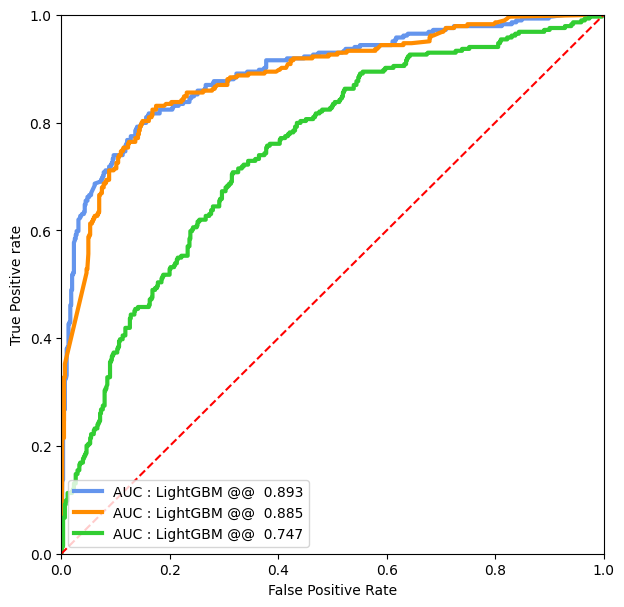

In [54]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import collections

import lightgbm
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score
import lightgbm as lgb
import joblib

from sklearn.model_selection import train_test_split, cross_val_predict

random_state_number = 92

# print("X_train",X_train.shape)
# print("X_test",X_test.shape)
# print("y_train",y_train.shape)
# print("y_test",y_test.shape)


algorithms_performances = {}
classifiers = {
                "Logisitic"    : LogisticRegression(),
                # "KNearest"     : KNeighborsClassifier(),
                # "Decision Tree": DecisionTreeClassifier(),
                # "Random Forest": RandomForestClassifier(),
                # "AdaBoost"     : AdaBoostClassifier(),
#                 "NNetwork"     : Neural_network,
#                 "TabPFN"       : TabPFNClassifier
                }

model_explanation_linear = {}
df_shap_dict = {}


nsplits = 2

track_datasets = []
# for n in ["normal model","LightGBM","Smote LGBM"]:
for n in ["LightGBM"]:
    if n == "normal model":
        for key, classifier in classifiers.items():
            fpr_list = []
            tpr_list = []
            pic_name_list = []
            for data_set in df_dataset_dict.keys():
                print(data_set)
                track_datasets.append(data_set)

                from sklearn.model_selection import KFold
                from sklearn.metrics import roc_auc_score, roc_curve
                
                kf = KFold(n_splits=nsplits, shuffle=True, random_state=random_state_number)

                X = df_dataset_dict[data_set]   # x for train
                y = df_y[data_set]#.to_numpy()  # y for train
                test_columns = df_dataset_dict[data_set].keys()
                
                auc_scores = []
                acc_scores = []
                f1_scores  = [] 

                
                for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y[train_index], y[test_index]

                
                    X_test, y_test = original_test_dataset_transform(df_for_test_scaled, test_columns)
                
                    classifier.fit(X_train, y_train)
                    print(f"Fold {fold+1} train size: ", X_train.shape)
                
                    model_explanation_linear[key + "_" + str(data_set) + "_fold_" + str(fold+1)] = classifier
                
                    y_pred = classifier.predict_proba(X_test)[:, 1]
                    fpr, tpr, thresh = roc_curve(y_test, y_pred)
                    auc = roc_auc_score(y_test, y_pred)
                    auc_scores.append(auc)
                
                    print(f"{key} Fold {fold+1} train AUC score:", auc)
                    
                    acc = accuracy_score(y_test, output_y_pred(y_pred))
                    acc_scores.append(acc)

                    f1  = f1_score(y_test,output_y_pred(y_pred))
                    f1_scores.append(f1)
                    
                
                avg_auc = np.mean(auc_scores)
                std_auc = np.std(auc_scores)

                avg_acc = np.mean(acc_scores)
                std_acc = np.std(acc_scores)

                avg_f1 = np.mean(f1_scores)
                std_f1 = np.std(f1_scores)
                
                print(f"Average AUC score across folds: {avg_auc}")
                print(f"Standard deviation of AUC scores: {std_auc}")

                print(f"Average ACC score across folds: {avg_acc}")
                print(f"Standard deviation of ACC scores: {std_acc}")

                print(f"Average F1 score across folds: {avg_f1}")
                print(f"Standard deviation of F1 scores: {std_f1}")
                
                key_words = key + "_" + data_set
                algorithms_performances[key_words] = avg_auc
                
                print("std_auc",std_auc)
                performances_metrics(algorithms_performances,
                                     avg_auc,std_auc,
                                     avg_acc,std_acc,
                                     avg_f1,std_f1,
                                     key_words,
                                     y_test, y_pred)
                
                pic_name = str(key_words) + " " + str(round(auc,3))
                
                pic_name_list.append(pic_name)
                print("this is the pic name list \n", pic_name_list)
                fpr_list.append(fpr)
                tpr_list.append(tpr)

            plot_roc_curve(fpr_list, tpr_list,pic_name_list)

            #===============================================
            dataset_smotes = 0
            
    elif n == "LightGBM":

        model_explanation = {}
        
        learning_rate = 0.1
        params = {'learning_rate': learning_rate,
                  "seed": 25,
                  "num_iterations": 20,
                  'metric': ["auc","cross_entropy"],
                  "objective":"binary",
                   'min_data_in_leaf': 3, 
                  'verbose': -1
                   }
        
        
        fpr_list = []
        tpr_list = []
        pic_name_list = []
        
        for data_set in df_dataset_dict.keys():
            print(data_set)

            kf = KFold(n_splits=nsplits, shuffle=True, random_state=random_state_number)
            
            X = df_dataset_dict[data_set]
            y = df_y[data_set]#.to_numpy()
            test_columns = df_dataset_dict[data_set].keys()
            
            auc_scores = []
            acc_scores = []
            f1_scores  = [] 
            
            for fold, (train_index, test_index) in enumerate(kf.split(X)):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]

                
                df_for_shap = X_train.copy()
                df_for_shap["label"] = y_train.tolist()
                df_shap_dict[data_set + "_fold_" + str(fold+1)] = df_for_shap

                # print("df_for_shap ====  types ====",df_for_shap.head())
            
                X_test, y_test = original_test_dataset_transform(df_for_test_scaled, test_columns)
                
                # df_shap = 
                
                clf = lgb.LGBMClassifier(
                    boosting_type='gbdt',
                    num_leaves=50, reg_alpha=0.0, reg_lambda=1,
                    max_depth=-1, n_estimators=100, objective='binary',
                    subsample=0.7, colsample_bytree=0.7, subsample_freq=1,
                    learning_rate=0.05, min_child_weight=50, random_state=2000, n_jobs=100,
                    verbose = -1,
                )
            
                clf.fit(X_train, y_train,
                        eval_set=[(X_train, y_train)],
                        eval_metric='auc',
                        # verbose=-1# early_stopping_rounds=1000
                       )
            
                model_explanation[data_set + "_fold_" + str(fold+1)] = clf



            
                

            
                y_pred = clf.predict_proba(X_test)[:, 1]
            
                y_demonstrate = {}
                y_demonstrate["y_pred"] = y_pred
                y_demonstrate["y_test"] = y_test
            
                fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, y_pred)
               
                auc = roc_auc_score(y_test, y_pred)
                auc_scores.append(auc)
                
                print(f"Fold {fold+1} train AUC score: {auc}")

                acc = accuracy_score(y_test, output_y_pred(y_pred))
                acc_scores.append(acc)

                f1  = f1_score(y_test,output_y_pred(y_pred))
                f1_scores.append(f1)

            
            avg_auc = np.mean(auc_scores)
            std_auc = np.std(auc_scores)

            avg_acc = np.mean(acc_scores)
            std_acc = np.std(acc_scores)

            avg_f1 = np.mean(f1_scores)
            std_f1 = np.std(f1_scores)


    
            # Update algorithms_performances with the average AUC
            # algorithms_performances[f"LightGBM_{data_set}_avg_auc"] = avg_auc
            
            print(f"Average AUC score across folds: {avg_auc}")
            print(f"Standard deviation of AUC scores: {std_auc}")


            key_words = "LightGBM @@ " + data_set

            print ("??",key_words)
            algorithms_performances[key_words] = avg_auc
            
            performances_metrics(algorithms_performances,
                                     avg_auc,std_auc,
                                     avg_acc,std_acc,
                                     avg_f1,std_f1,
                                     key_words, 
                                     y_test, y_pred)

            pic_name = "LightGBM @@ " + " " +  str(round(auc,3))
            print(" ++++++++++++++++++++++++++++ key_words ,", key_words)

            pic_name_list.append(pic_name)
            fpr_list.append(fpr_gbc)
            tpr_list.append(tpr_gbc)

        plot_roc_curve(fpr_list, tpr_list,pic_name_list)
        
    elif n == "Smote LGBM":
        
        learning_rate = 0.1
        params = {'learning_rate': learning_rate,
                  "seed": 25,
                  "num_iterations": 20,
                  'metric': ["auc","cross_entropy"],
                  "objective":"binary",
                   'min_data_in_leaf': 3, 
                   }
        
        
        fpr_list = []
        tpr_list = []
        pic_name_list = []
        
#         print("smote algorithm \n")      
        from imblearn.over_sampling import SMOTE

        for data_set in df_dataset_dict.keys():
            print(data_set)

            kf = KFold(n_splits=nsplits, shuffle=True, random_state=random_state_number)
            
            X = df_dataset_dict[data_set]
            y = df_y[data_set]#.to_numpy()
            test_columns = df_dataset_dict[data_set].keys()
            
            auc_scores = []
            acc_scores = []
            f1_scores  = [] 
            
            for fold, (train_index, test_index) in enumerate(kf.split(X)):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]
            
                X_test, y_test = original_test_dataset_transform(df_for_test_scaled, test_columns)
            
                oversample = SMOTE(random_state=2)
                X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
            
                clf_resample = lgb.LGBMClassifier(
                    boosting_type='gbdt',
                    num_leaves=50, reg_alpha=0.0, reg_lambda=1,
                    max_depth=-1, n_estimators=100, objective='binary',
                    subsample=0.7, colsample_bytree=0.7, subsample_freq=1,
                    learning_rate=0.05, min_child_weight=50, random_state=2000, n_jobs=100, #verbose=-1
                )
            
                clf_resample.fit(X_train_res, y_train_res,
                                 eval_set=[(X_train_res, y_train_res)],
                                 eval_metric='auc', early_stopping_rounds=1000, 
                                 # verbose=-1
                                )
            
                model_explanation[data_set + "_smote_fold_" + str(fold+1)] = clf_resample
            
                y_pred = clf_resample.predict_proba(X_test)[:, 1]
            
                y_demonstrate = {}
                y_demonstrate["y_pred"] = y_pred
                y_demonstrate["y_test"] = y_test
            
                key_words = "Smote_LightGBM_" + data_set + "_fold_" + str(fold+1)
            
                fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_test, y_pred)
                
                auc = roc_auc_score(y_test, y_pred)
                auc_scores.append(auc)

                acc = accuracy_score(y_test, output_y_pred(y_pred))
                acc_scores.append(acc)

                f1  = f1_score(y_test,output_y_pred(y_pred))
                f1_scores.append(f1)
            
                print(f"{key_words} train AUC score: {auc}")
            
            avg_auc = np.mean(auc_scores)
            std_auc = np.std(auc_scores)

            avg_acc = np.mean(acc_scores)
            std_acc = np.std(acc_scores)

            avg_f1 = np.mean(f1_scores)
            std_f1 = np.std(f1_scores)
            
            print(f"Average AUC score across folds: {avg_auc}")
            print(f"Standard deviation of AUC scores: {std_auc}")
            
            algorithms_performances["Smote_LightGBM_" + data_set + "_avg_auc"] = avg_auc

            performances_metrics(algorithms_performances,
                                     avg_auc,std_auc,
                                     avg_acc,std_acc,
                                     avg_f1,std_f1,
                                     key_words,
                                     y_test, y_pred)

            pic_name = "Smote_LightGBM" + " " +  str(round(avg_auc,3))

            pic_name_list.append(pic_name)
            fpr_list.append(fpr_gbc)
            tpr_list.append(tpr_gbc)

        plot_roc_curve(fpr_list, tpr_list,pic_name_list)

In [55]:
df_shap_dict.keys()

dict_keys(['complete data_fold_1', 'complete data_fold_2', 'only academic data_fold_1', 'only academic data_fold_2', 'without academic data_fold_1', 'without academic data_fold_2', ' only Demographic data_fold_1', ' only Demographic data_fold_2', 'synthetic ==> complete data_fold_1', 'synthetic ==> complete data_fold_2', 'synthetic ==> only academic data_fold_1', 'synthetic ==> only academic data_fold_2', 'synthetic ==> without academic data_fold_1', 'synthetic ==> without academic data_fold_2', 'synthetic ==> only Demographic data_fold_1', 'synthetic ==> only Demographic data_fold_2', 'distilled ==> complete data_fold_1', 'distilled ==> complete data_fold_2', 'distilled ==> only academic data_fold_1', 'distilled ==> only academic data_fold_2', 'distilled ==> without academic data_fold_1', 'distilled ==> without academic data_fold_2', 'distilled ==> only Demographic data_fold_1', 'distilled ==> only Demographic data_fold_2'])

In [56]:
df_for_test_scaled.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployme

In [57]:
stats_plot_data_all = pd.DataFrame(algorithms_performances,index=["AUC","AUC std",
                                                                  "Accuracy","Accuracy std",
                                                                  "F1 Score","F1 Score std",
                                                                  "Precision","Recall",
                                            "KS","G_Mean","BAcc","tpr","MCC",
                                            "counts_ratio","kappa"]).transpose()

stats_plot_data_all.to_excel("/kaggle/working/stats_plot_data_all.xlsx")
# pd.set_option('display.max_rows', None) 
stats_plot_data_all

,AUC,AUC std,Accuracy,Accuracy std,F1 Score,F1 Score std,Precision,Recall,KS,G_Mean,BAcc,tpr,MCC,counts_ratio,kappa
LightGBM @@ complete data,0.891708,0.000989,0.850847,0.003390,0.758660,0.006367,0.785441,0.721831,0.628653,0.809056,0.814326,0.721831,0.643569,0.294915,0.642373
LightGBM @@ only academic data,0.882701,0.001802,0.841243,0.001695,0.741493,0.002522,0.779923,0.711268,0.616426,0.802377,0.808213,0.711268,0.632470,0.292655,0.631076
LightGBM @@ without academic data,0.742328,0.004341,0.728814,0.003390,0.479393,0.006508,0.632768,0.394366,0.286213,0.593055,0.643107,0.394366,0.334028,0.200000,0.317789
LightGBM @@ only Demographic data,0.675333,0.005036,0.696610,0.001695,0.273683,0.036395,0.582524,0.211268,0.139720,0.442890,0.569860,0.211268,0.203392,0.116384,0.167949
LightGBM @@ synthetic ==> complete data,0.848739,0.005441,0.818644,0.001695,0.725877,0.002328,0.701987,0.746479,0.596728,0.796676,0.798364,0.746479,0.587537,0.341243,0.586918
LightGBM @@ synthetic ==> only academic data,0.854850,0.001082,0.818079,0.004520,0.724326,0.006377,0.697674,0.739437,0.588022,0.792133,0.794011,0.739437,0.579429,0.340113,0.578884
LightGBM @@ synthetic ==> without academic data,0.650281,0.019489,0.670056,0.032768,0.473152,0.018144,0.439344,0.471831,0.187305,0.581019,0.593653,0.471831,0.183985,0.344633,0.183722
LightGBM @@ synthetic ==> only Demographic data,0.595290,0.015470,0.618079,0.009040,0.406961,0.016116,0.390845,0.390845,0.102991,0.527578,0.551496,0.390845,0.102991,0.320904,0.102991
LightGBM @@ distilled ==> complete data,0.873210,0.000937,0.835028,0.000000,0.746080,0.001325,0.739583,0.750000,0.625208,0.810189,0.812604,0.750000,0.622927,0.325424,0.622894
LightGBM @@ distilled ==> only academic data,0.866266,0.005781,0.828814,0.003955,0.740839,0.003106,0.731293,0.757042,0.625595,0.810883,0.812797,0.757042,0.620043,0.332203,0.619839


In [58]:
stats_plot_data_all.to_excel("/kaggle/working/stats_plot_data_all.xlsx")
# to_csv('/kaggle/working/synthetic_2000.csv')

In [59]:
# if key_words not in auc_scores.keys():
#     auc_scores[key_words]=[auc]
# else:
#     auc_scores[key_words].append(auc)
    
# pd.DataFrame(performances_metrics(algorithms_performances_new,key_words,y_test, y_pred)).transpose()

In [60]:
# df_labelled_dict.keys()
df_labelled_dict = df_dataset_dict

In [61]:
n_rows = len(df_labelled_dict)
print("n_rows",n_rows)

dataset_name_indexes = range(len(df_labelled_dict.keys()))
print("dataset_name_indexes",len(dataset_name_indexes))

int(len(dataset_name_indexes)/n_rows)

n_rows 12
dataset_name_indexes 12


1

@@@  3 4
==  0 0
==  0 1
==  0 2
==  0 3
==  1 0
==  1 1
==  1 2
==  1 3
==  2 0
==  2 1
==  2 2
==  2 3


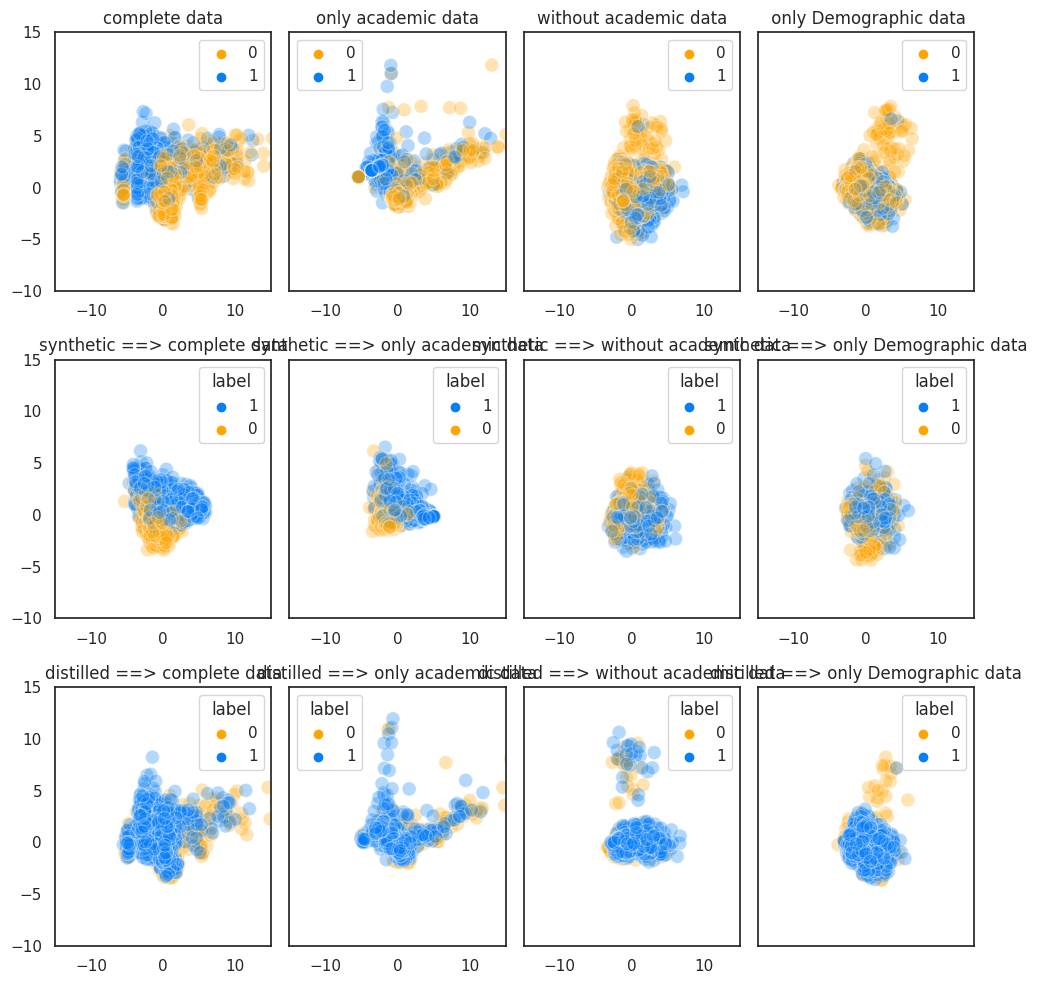

In [62]:
def datasets_dict_with_support_sizes_plot(df_labelled_dict):
    
    
    palette = {'0': 'orange', '1': '#067ef7'}
    
    n_rows = int(len(df_labelled_dict)/4)
    
    dataset_name_indexes = range(len(df_labelled_dict.keys()))
                               
    n_cols = int(len(dataset_name_indexes)/n_rows)
                               
    sns.set_theme(style="white")
    
    n = len(df_labelled_dict)
    
    fig, ax = plt.subplots(n_rows,int(n_cols), sharey="row",figsize=(10,10))
    print("@@@ ",n_rows,int(n_cols))

    ck = 0
    keys = list(df_labelled_dict.keys())
    
    for dataset_name_index in dataset_name_indexes:
        
        
        X_train = df_labelled_dict[keys[dataset_name_index]]
        y_train =  df_y[keys[dataset_name_index]]#.to_numpy()
     
        X_stand_original = StandardScaler()   .fit_transform(X_train) 
        pca_original     = PCA(n_components=2).fit(X_stand_original)
        X_pca            = pca_original       .transform(X_stand_original)
        
        
        jk = dataset_name_index%n_cols
        
        print("== ",ck//n_cols,jk)
 
        sns.scatterplot(x         = X_pca[:, 0], 
                        y         = X_pca[:, 1], 
                        hue       = y_train.astype(int).astype(str), 
                        alpha     = 0.3, 
                        ax        = ax[ck//n_cols,jk],
                        edgecolor = "white",
                        palette   = palette,
                        edgecolors=None,
                        sizes     = (70, 400),
                        s         = 100)

#         print("locations : ",[ck//n_cols,jk])
        
        dataset_name_key = keys[dataset_name_index]

        ax[ck//n_cols,jk].title.set_text(dataset_name_key)
        ax[ck//n_cols,jk].grid(False)
        ax[ck // n_cols, jk].set_xlim(-15, 15)
        ax[ck // n_cols, jk].set_ylim(-5, 15)
        # ax[ck // n_cols, jk].set_xticks(range(-15, 16, 5))
        ax[ck // n_cols, jk].set_yticks(range(-10, 16, 5)) # Set y-ticks for every 5 units


        ck += 1

    plt.tick_params(bottom=False, labelbottom=False, labelleft=False)
    
    plt.tight_layout()
    plt.tight_layout(pad=2.0)
    plt.grid(False)
#     algos = str("algorithms == " + algo)
#     plt.title(algos)
    plt.savefig("/kaggle/working/data distribution plotting.png",dpi=600)
    plt.tight_layout()
    plt.show()
    
datasets_dict_with_support_sizes_plot(df_labelled_dict)

['complete data', 'only academic data', 'without academic data', ' only Demographic data', 'synthetic ==> complete data', 'synthetic ==> only academic data', 'synthetic ==> without academic data', 'synthetic ==> only Demographic data', 'distilled ==> complete data', 'distilled ==> only academic data', 'distilled ==> without academic data', 'distilled ==> only Demographic data']
                                           Feature  Target
28             Curricular units 2nd sem (approved)      52
18                                   International      30
29                Curricular units 2nd sem (grade)      27
3                                           Course      18
22             Curricular units 1st sem (approved)      18
21          Curricular units 1st sem (evaluations)      13
23                Curricular units 1st sem (grade)      11
20             Curricular units 1st sem (enrolled)      10
1                                 Application mode       9
26             Curricular uni

<Axes: >

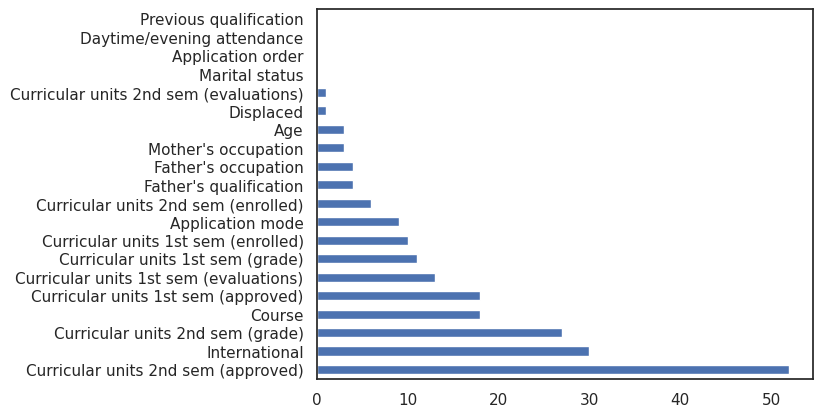

In [63]:
# Obtain gain feature importance
keys  = list(df_labelled_dict.keys())

print(keys)
model = model_explanation[keys[0]+"_fold_1"]

# df_labelled_x = X_train_original

gain_importance = model.feature_importances_

# Display feature importance with feature names
feature_names = df_labelled_x.columns
gain_importance_df = pd.DataFrame({'Feature': feature_names, 'Target': gain_importance})
print(gain_importance_df.sort_values(by='Target', ascending=False))

(pd.Series(gain_importance, index=feature_names).nlargest(20).plot(kind='barh',label="importance"))

In [64]:
# model_explanation.keys()

In [65]:
import shap
import numpy as np

# model_explanation

In [66]:
# list(model_explanation_linear.keys())

In [67]:
# df_labelled_dict.head()
keys

['complete data',
 'only academic data',
 'without academic data',
 ' only Demographic data',
 'synthetic ==> complete data',
 'synthetic ==> only academic data',
 'synthetic ==> without academic data',
 'synthetic ==> only Demographic data',
 'distilled ==> complete data',
 'distilled ==> only academic data',
 'distilled ==> without academic data',
 'distilled ==> only Demographic data']

In [68]:
df_labelled_dict.keys()

dict_keys(['complete data', 'only academic data', 'without academic data', ' only Demographic data', 'synthetic ==> complete data', 'synthetic ==> only academic data', 'synthetic ==> without academic data', 'synthetic ==> only Demographic data', 'distilled ==> complete data', 'distilled ==> only academic data', 'distilled ==> without academic data', 'distilled ==> only Demographic data'])

scenarios : ==  complete data
complete data


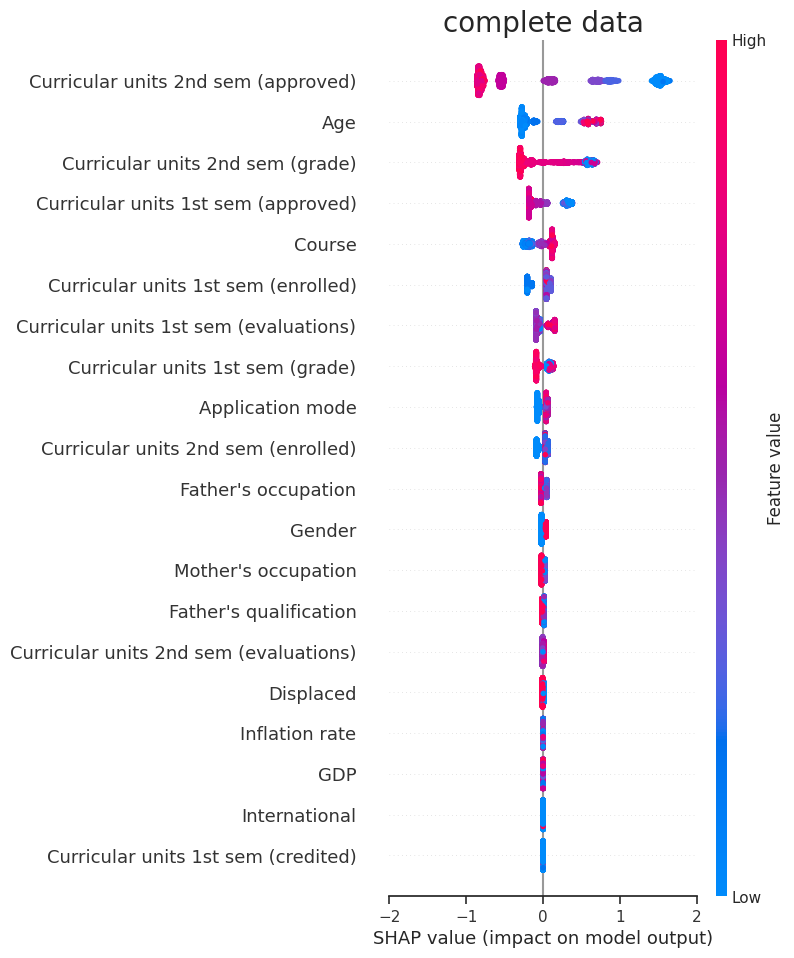

In [69]:
from matplotlib import pyplot as plt

n = 0

scenarios = keys[n]
print("scenarios : == ",scenarios)
model = model_explanation[scenarios +"_fold_1"]


print(scenarios)

#==========================================

explainer = shap.TreeExplainer(model)


shap.initjs() 


df_labelled_dict = df_dataset_dict

shap_values = explainer.shap_values(df_labelled_dict[scenarios])


plt.figure(figsize=(10, 6))

plot_shap = shap.summary_plot(  shap_values[1], 
                                df_labelled_dict[scenarios],
                                show=False, 
                                max_display = 20,
#                                 max_display=df_labelled_dict[scenarios].shape[1]
                             )

plt.xlim(-2, 2)
plt.title(scenarios, fontsize = 20)


plt.savefig("/kaggle/working/global shap, complete dataset.png",dpi=600)
plt.show()

# plt.savefig(plot_shap)



In [70]:
df_for_train.label.unique()

array([0, 1])

In [71]:
df_shap_dict.keys()
df_shap_dict["complete data_fold_1"]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,label
0,-0.292020,1.340816,-0.556229,0.020585,0.347852,2.842606,-0.142136,-1.139930,-1.402409,-1.337426,...,2.836043,1.700121,1.250659,1.838465,0.304781,-0.19553,0.872138,-1.103473,0.339595,0
2,-0.292020,1.529392,-0.556229,-1.362645,0.347852,2.842606,-0.142136,-1.250968,1.045651,0.677753,...,-0.283546,-0.102239,1.754739,-0.143258,0.056446,-0.19553,1.473648,1.143597,-1.795621,0
4,-0.292020,0.209358,-0.556229,0.481661,0.347852,-0.390915,-0.142136,1.080819,0.954982,-0.329837,...,-0.283546,0.798941,-0.009543,0.847603,0.864762,-0.19553,-0.293287,0.128791,0.757833,0
5,-0.292020,0.209358,-0.556229,0.020585,0.347852,-0.390915,-0.142136,1.080819,-0.223713,0.677753,...,-0.283546,-0.102239,0.998618,-0.473545,0.279310,-0.19553,0.421006,1.795972,-0.756629,0
7,-0.292020,0.397934,1.738946,1.403814,0.347852,-0.390915,-0.142136,0.081482,0.954982,0.677753,...,-0.283546,-0.102239,-0.513624,-1.464407,-1.949336,-0.19553,-0.180504,-0.451098,0.881104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,-0.292020,-1.110677,-0.556229,0.942738,0.347852,-0.390915,-0.142136,-1.250968,0.954982,-0.581734,...,-0.283546,-0.552829,-0.513624,-0.143258,0.151959,-0.19553,-1.496306,0.998625,0.132677,0
3530,-0.292020,0.963663,-0.556229,-0.209953,0.347852,1.598944,-0.142136,1.080819,0.954982,0.677753,...,-0.283546,-0.552829,-0.009543,0.187029,0.381191,-0.19553,-1.496306,0.998625,0.132677,0
3535,-0.292020,0.397934,-0.556229,-1.593183,-2.874787,-0.390915,-0.142136,0.081482,-1.402409,0.677753,...,-0.283546,-0.102239,-0.009543,0.517316,0.796675,-0.19553,0.308223,-0.523584,0.779846,0
3536,1.382956,1.717968,-0.556229,-1.593183,-2.874787,2.345141,-0.142136,1.080819,0.954982,0.677753,...,2.316112,2.150711,1.502699,1.838465,0.495807,-0.19553,-0.180504,-0.451098,0.881104,0


In [72]:
force_plot_dict = {} 
force_plot_dict["Graduate" ] = 0
force_plot_dict["Dropout"  ] = 4
# force_plot_dict["Enrolled" ] =2

In [73]:
# "/kaggle/working/"+ status

# plt.savefig("/kaggle/working/global shap, without academic dataset.png",dpi=600)

In [74]:
explainer.expected_value
shap_values[0][1]

array([ 0.        , -0.03577769,  0.        , -0.02342919,  0.        ,
        0.        ,  0.        ,  0.        , -0.00476785,  0.00856369,
       -0.01970915,  0.00220851,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.0315186 , -0.58806584,  0.        ,
        0.20544359,  0.03757626, -0.30455366, -0.07722918,  0.        ,
        0.        ,  0.08497757,  0.00250063, -1.48209652, -0.56612272,
        0.        ,  0.        ,  0.        ,  0.        ])

complete data
the Graduate student...


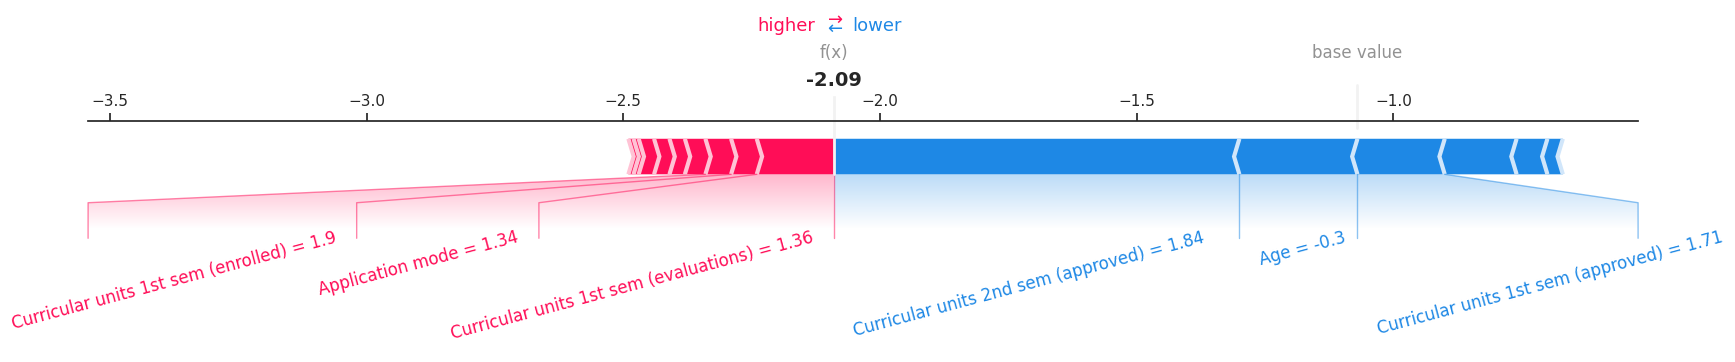

complete data
the dropout student...


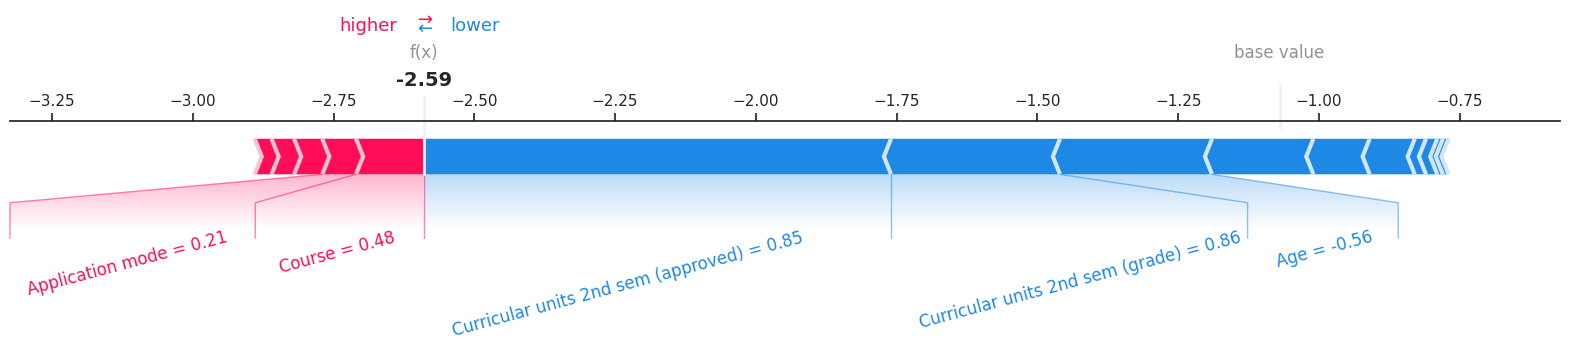

In [75]:
n = 0

#==============================

# status ="/kaggle/working/individual shap _" + keys[n] +  "plot2_Enrolled_.png"
# index = force_plot_dict["Enrolled" ] 
# print ( keys[n] + "\n" + "the Enrolled student...")

# shap.force_plot(np.around(explainer.expected_value[1], decimals = 2), 
#                 np.around(shap_values[1][index,:], decimals = 2),
#                 np.around(df_labelled_dict[keys[n]].iloc[index,:], decimals = 2),
#                 # link="logit",
#                 text_rotation=15,  
#                 matplotlib=True,
#                 show=False
#                )
# # plt.xlim(-3, 3)
# plt.savefig(status,dpi=600)
# # plt.show()

#==============================

status = "/kaggle/working/individual shap _" + keys[n] + "plot2_Graduate_.png"
index = force_plot_dict["Graduate"] 
print ( keys[n] + "\n" + "the Graduate student...")
shap.force_plot(np.around(explainer.expected_value[1], decimals = 2), 
                np.around(shap_values[1][index], decimals = 2), 
                np.around(df_labelled_dict[keys[n]].iloc[index], decimals = 2),
                matplotlib=True,show=False,
                text_rotation=15,  
               )
# plt.xlim(-3, 3)
plt.savefig(status,dpi=600)
plt.show()


#==============================

status = "/kaggle/working/individual shap _" + keys[n] + "plot2_Dropout_.png"
index = force_plot_dict["Dropout" ] 
print ( keys[n] + "\n" +"the dropout student...")
shap.force_plot(np.around(explainer.expected_value[1], decimals = 2), 
                np.around(shap_values[1][index], decimals = 2), 
                np.around(df_labelled_dict[keys[n]].iloc[index], decimals = 2),
                matplotlib=True,show=False,
                text_rotation=15,  
               )


# plt.title(status, fontsize = 20,loc='left')
# plt.xlim(-3, 3)
plt.savefig(status,dpi=600)
plt.show()

In [76]:
# 

In [77]:
keys

['complete data',
 'only academic data',
 'without academic data',
 ' only Demographic data',
 'synthetic ==> complete data',
 'synthetic ==> only academic data',
 'synthetic ==> without academic data',
 'synthetic ==> only Demographic data',
 'distilled ==> complete data',
 'distilled ==> only academic data',
 'distilled ==> without academic data',
 'distilled ==> only Demographic data']

scenarios : ==  without academic data


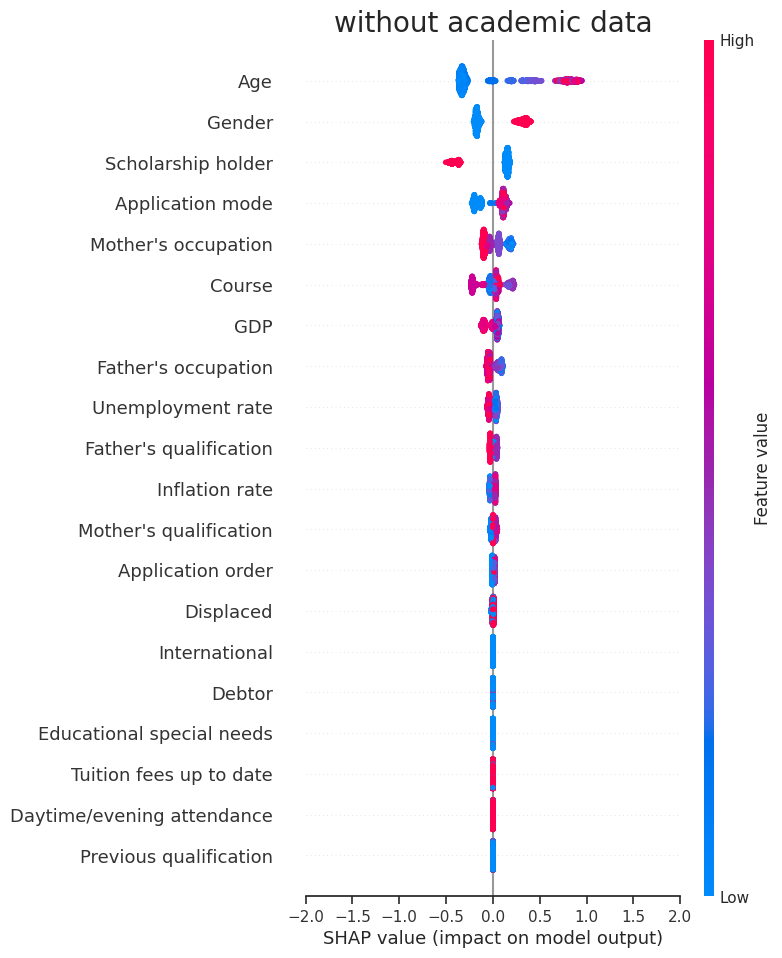

In [78]:
import matplotlib.pyplot as plt

n = 2
scenarios = keys[n]

model = model_explanation[scenarios+"_fold_1"]
print("scenarios : == ",scenarios)

explainer = shap.TreeExplainer(model)
shap.initjs() 

shap_values = explainer.shap_values(df_labelled_dict[scenarios])


plt.figure(figsize=(10, 6))


shap.summary_plot(  shap_values[1], 
                    df_labelled_dict[scenarios],
                    show=False, 
                      max_display = 20,
#                     max_display=df_labelled_dict[scenarios].shape[1]
                 )



plt.xlim(-2, 2)
plt.title(scenarios, fontsize = 20)

plt.title(scenarios, fontsize=20)
plt.savefig("/kaggle/working/global shap, without academic dataset.png",dpi=600)


plt.show()


# plt.savefig(plot_shap)
